In [1]:

%load_ext autoreload
%autoreload 2
import numpy as np
import xarray as xr
import pySAMetrics
import matplotlib.pyplot as plt
from pySAMetrics.Simulation import Simulation
from pySAMetrics.utils import generate_simulation_paths
from tqdm import tqdm
import pywt

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [3]:
simu_list=[]

### add control case
# Example usage
velocity = '0'
temperature='300'
bowen_ratio='1'
microphysic='1'

paths = generate_simulation_paths(velocity=velocity, temperature=temperature, bowen_ratio=bowen_ratio, microphysic=microphysic, folder_path='/home/ec2-user/DeepCloudLab/outputs')

print(paths)

simu = Simulation(data_folder_paths=[paths['path_1d'], paths['path_2d'], paths['path_3d']],
                velocity=velocity,
                temperature=temperature,
                bowen_ratio=bowen_ratio,
                microphysic=microphysic)

simu.load(backup_folder_path='/home/ec2-user/DeepCloudLab/processed_classes')
simu_list.append(simu)


### add shear cases
for velocity in tqdm(['2.5', '5', '10', '20']):
    temperature='300'
    bowen_ratio='1'
    microphysic='1'

    paths = generate_simulation_paths(velocity=velocity, temperature=temperature, bowen_ratio=bowen_ratio, microphysic=microphysic, folder_path='/home/ec2-user/DeepCloudLab/outputs')

    print(paths)

    simu = Simulation(data_folder_paths=[paths['path_1d'], paths['path_2d'], paths['path_3d']],
                    velocity=velocity,
                    temperature=temperature,
                    bowen_ratio=bowen_ratio,
                    microphysic=microphysic)

    simu.load(backup_folder_path='/home/ec2-user/DeepCloudLab/processed_classes')
    simu_list.append(simu)



{'path_3d': '/home/ec2-user/DeepCloudLab/outputs/RCE_T300_U0_B1_M1/WORK/NETCDF_files/3D/dataset_3d.nc', 'path_2d': '/home/ec2-user/DeepCloudLab/outputs/RCE_T300_U0_B1_M1/WORK/NETCDF_files/2D/RCE_T300_U0_SAM1MOM_B1_128x128x64_64.2Dcom_1.nc', 'path_1d': '/home/ec2-user/DeepCloudLab/outputs/RCE_T300_U0_B1_M1/WORK/NETCDF_files/1D/RCE_T300_U0_SAM1MOM_B1_128x128x64.nc'}
****/home/ec2-user/DeepCloudLab/processed_classes/RCE_T300_U0_B1_M1


  0%|          | 0/4 [00:00<?, ?it/s]

{'path_3d': '/home/ec2-user/DeepCloudLab/outputs/RCE_T300_U2.5_B1_M1/WORK/NETCDF_files/3D/dataset_3d.nc', 'path_2d': '/home/ec2-user/DeepCloudLab/outputs/RCE_T300_U2.5_B1_M1/WORK/NETCDF_files/2D/RCE_T300_U2.5_SAM1MOM_B1_128x128x64_64.2Dcom_1.nc', 'path_1d': '/home/ec2-user/DeepCloudLab/outputs/RCE_T300_U2.5_B1_M1/WORK/NETCDF_files/1D/RCE_T300_U2.5_SAM1MOM_B1_128x128x64.nc'}


 25%|██▌       | 1/4 [00:17<00:52, 17.46s/it]

****/home/ec2-user/DeepCloudLab/processed_classes/RCE_T300_U2.5_B1_M1
{'path_3d': '/home/ec2-user/DeepCloudLab/outputs/RCE_T300_U5_B1_M1/WORK/NETCDF_files/3D/dataset_3d.nc', 'path_2d': '/home/ec2-user/DeepCloudLab/outputs/RCE_T300_U5_B1_M1/WORK/NETCDF_files/2D/RCE_T300_U5_SAM1MOM_B1_128x128x64_64.2Dcom_1.nc', 'path_1d': '/home/ec2-user/DeepCloudLab/outputs/RCE_T300_U5_B1_M1/WORK/NETCDF_files/1D/RCE_T300_U5_SAM1MOM_B1_128x128x64.nc'}


 50%|█████     | 2/4 [00:35<00:35, 17.53s/it]

****/home/ec2-user/DeepCloudLab/processed_classes/RCE_T300_U5_B1_M1
{'path_3d': '/home/ec2-user/DeepCloudLab/outputs/RCE_T300_U10_B1_M1/WORK/NETCDF_files/3D/dataset_3d.nc', 'path_2d': '/home/ec2-user/DeepCloudLab/outputs/RCE_T300_U10_B1_M1/WORK/NETCDF_files/2D/RCE_T300_U10_SAM1MOM_B1_128x128x64_64.2Dcom_1.nc', 'path_1d': '/home/ec2-user/DeepCloudLab/outputs/RCE_T300_U10_B1_M1/WORK/NETCDF_files/1D/RCE_T300_U10_SAM1MOM_B1_128x128x64.nc'}


 75%|███████▌  | 3/4 [00:52<00:17, 17.53s/it]

****/home/ec2-user/DeepCloudLab/processed_classes/RCE_T300_U10_B1_M1
{'path_3d': '/home/ec2-user/DeepCloudLab/outputs/RCE_T300_U20_B1_M1/WORK/NETCDF_files/3D/dataset_3d.nc', 'path_2d': '/home/ec2-user/DeepCloudLab/outputs/RCE_T300_U20_B1_M1/WORK/NETCDF_files/2D/RCE_T300_U20_SAM1MOM_B1_128x128x64_64.2Dcom_1.nc', 'path_1d': '/home/ec2-user/DeepCloudLab/outputs/RCE_T300_U20_B1_M1/WORK/NETCDF_files/1D/RCE_T300_U20_SAM1MOM_B1_128x128x64.nc'}


100%|██████████| 4/4 [01:08<00:00, 17.04s/it]

****/home/ec2-user/DeepCloudLab/processed_classes/RCE_T300_U20_B1_M1


In [4]:
[simu.name for simu in simu_list[:5]]

['RCE_T300_U0_B1_M1',
 'RCE_T300_U2.5_B1_M1',
 'RCE_T300_U5_B1_M1',
 'RCE_T300_U10_B1_M1',
 'RCE_T300_U20_B1_M1']

In [6]:
array_isentropic_all=[]

one_hot_encoding = [[1,0,0,0,0],[0,1,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1]]

# Loop through the simulations and add new variables
winds = []
for i, simu in enumerate(simu_list[:2]):
    new_variable = simu.dataset_isentropic.RHO_W.values  # Extract the new variabl
    array_isentropic_all.append(new_variable)
    winds.append([one_hot_encoding[i]]*len(new_variable))

array_isentropic_all=np.array(array_isentropic_all)
#array_winds_all=np.array([j for ii in winds for j in ii])
reshaped_data = array_isentropic_all.reshape(-1, 64, 50)


In [7]:
reshaped_data.shape

(962, 64, 50)

In [8]:
reshaped_data = np.nan_to_num(reshaped_data)
mean_norm_data, std_norm_data = reshaped_data.mean(), reshaped_data.std()
print('mean', 'std', reshaped_data.mean(), reshaped_data.std())
reshaped_data = (reshaped_data - reshaped_data.mean()) / reshaped_data.std()  # Normalize data
#reshaped_data = reshaped_data.reshape((reshaped_data.shape[0], -1))
#reshaped_data = np.concatenate([reshaped_data, array_winds_all], axis=-1)

mean std 0.5295836408742808 1.5313830478817303


In [9]:
reshaped_data.shape

(962, 64, 50)

In [10]:
# Set the split percentages
train_split = 0.7
val_split = 0.15
test_split = 0.15

# Calculate split indices
total_samples = reshaped_data.shape[0]
train_size = int(train_split * total_samples)
val_size = int(val_split * total_samples)
test_size = total_samples - train_size - val_size

# Shuffle the data (optional, but common in dataset splitting)
indices = np.random.permutation(total_samples)
train_indices = indices[:train_size]
val_indices = indices[train_size:train_size + val_size]
test_indices = indices[train_size + val_size:]

# Split the data
train_data = reshaped_data[train_indices]
val_data = reshaped_data[val_indices]
test_data = reshaped_data[test_indices]

"""
# Convert to PyTorch tensors
train_tensor = torch.tensor(train_data, dtype=torch.float32)
val_tensor = torch.tensor(val_data, dtype=torch.float32)
test_tensor = torch.tensor(test_data, dtype=torch.float32)

# Create TensorDatasets
train_dataset = TensorDataset(train_tensor)
val_dataset = TensorDataset(val_tensor)
test_dataset = TensorDataset(test_tensor)

# Create DataLoaders for batching during training
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
"""

'\n# Convert to PyTorch tensors\ntrain_tensor = torch.tensor(train_data, dtype=torch.float32)\nval_tensor = torch.tensor(val_data, dtype=torch.float32)\ntest_tensor = torch.tensor(test_data, dtype=torch.float32)\n\n# Create TensorDatasets\ntrain_dataset = TensorDataset(train_tensor)\nval_dataset = TensorDataset(val_tensor)\ntest_dataset = TensorDataset(test_tensor)\n\n# Create DataLoaders for batching during training\nbatch_size = 32\ntrain_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)\nval_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)\ntest_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)\n'

In [11]:
fmse, z = simu_list[0].dataset_isentropic.fmse.values, simu_list[0].dataset_3d.z.values/1000
XX,ZZ = np.meshgrid(fmse, z)

In [55]:
# Parameters
wavelet = 'db1'  # Choose a wavelet, e.g., 'db1' (Daubechies), 'haar'
level = 2  # Decomposition level
nt = len(train_data)
img = train_data[10, :, :]
# Perform wavelet decomposition
coeffs = pywt.wavedec2(img, wavelet=wavelet, level=level)
reconstructed_img = pywt.waverec2(coeffs, wavelet=wavelet)

In [56]:
cA, (cH, cV, cD) = coeffs[0], coeffs[1]

In [60]:
cD.shape

(16, 13)

In [64]:
img.shape

(64, 50)

In [65]:
# Shape of the approximation and details coefficients
LL, (HL, LH, HH) = coeffs[0], coeffs[1]
LL_shape = LL.shape
HL_shape = HL.shape
LH_shape = LH.shape
HH_shape = HH.shape

print(f"Approximation Coefficients (LL) shape: {LL_shape}")
print(f"Horizontal Detail Coefficients (HL) shape: {HL_shape}")
print(f"Vertical Detail Coefficients (LH) shape: {LH_shape}")
print(f"Diagonal Detail Coefficients (HH) shape: {HH_shape}")


Approximation Coefficients (LL) shape: (8, 7)
Horizontal Detail Coefficients (HL) shape: (8, 7)
Vertical Detail Coefficients (LH) shape: (8, 7)
Diagonal Detail Coefficients (HH) shape: (8, 7)


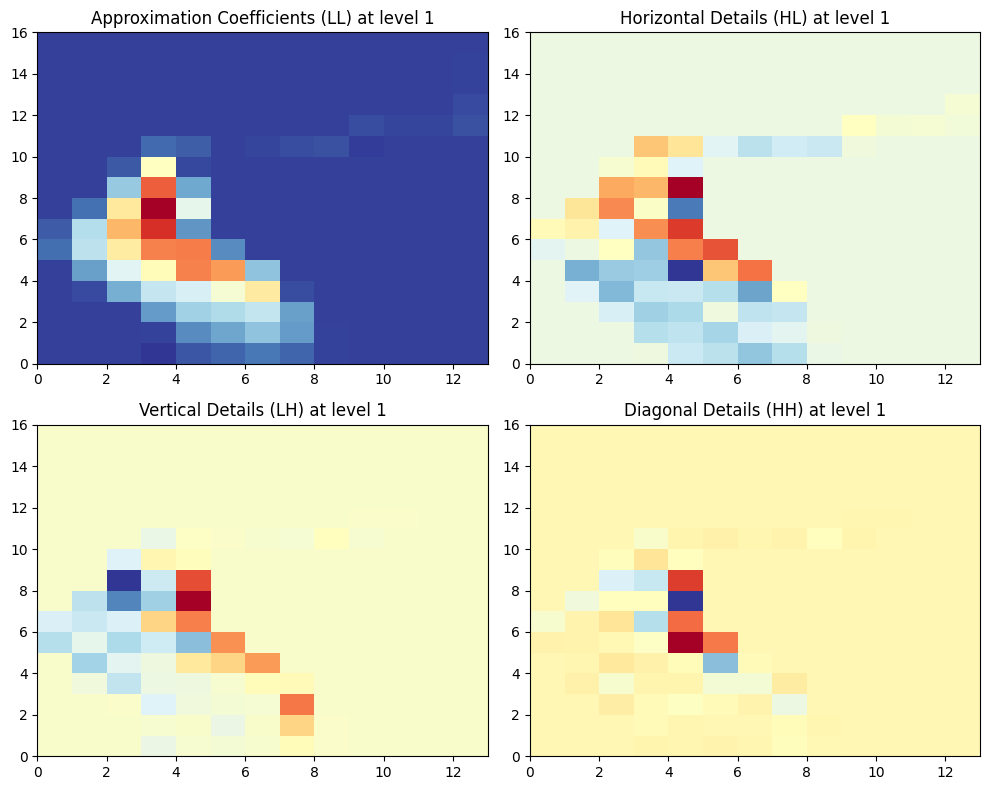

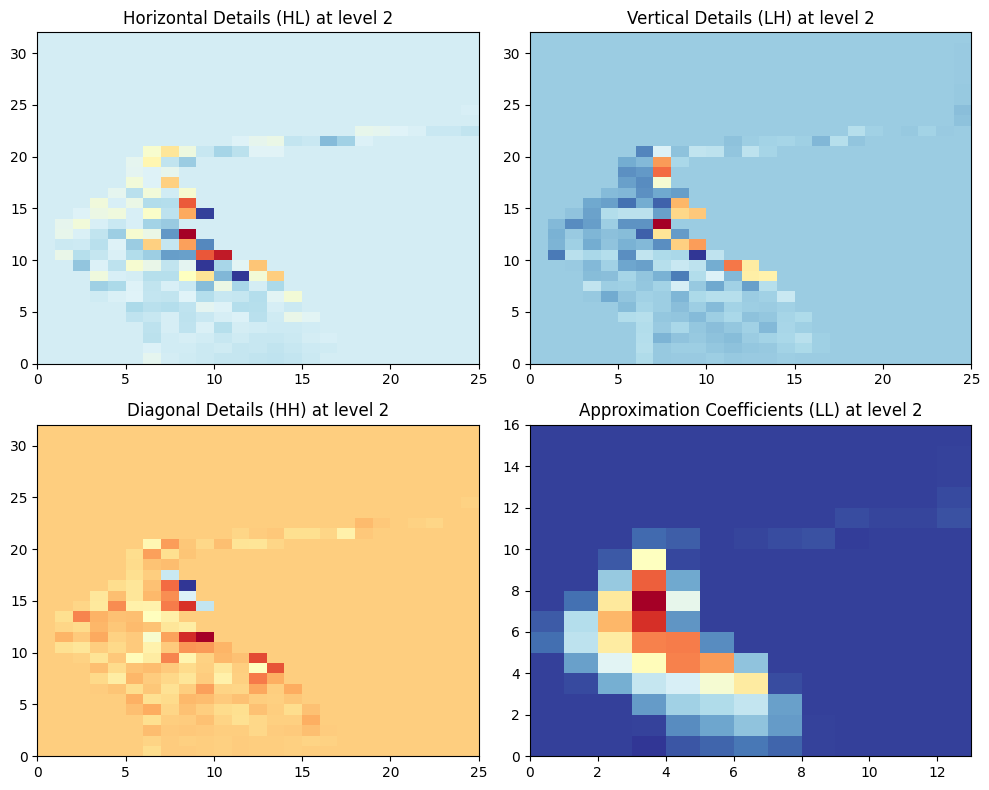

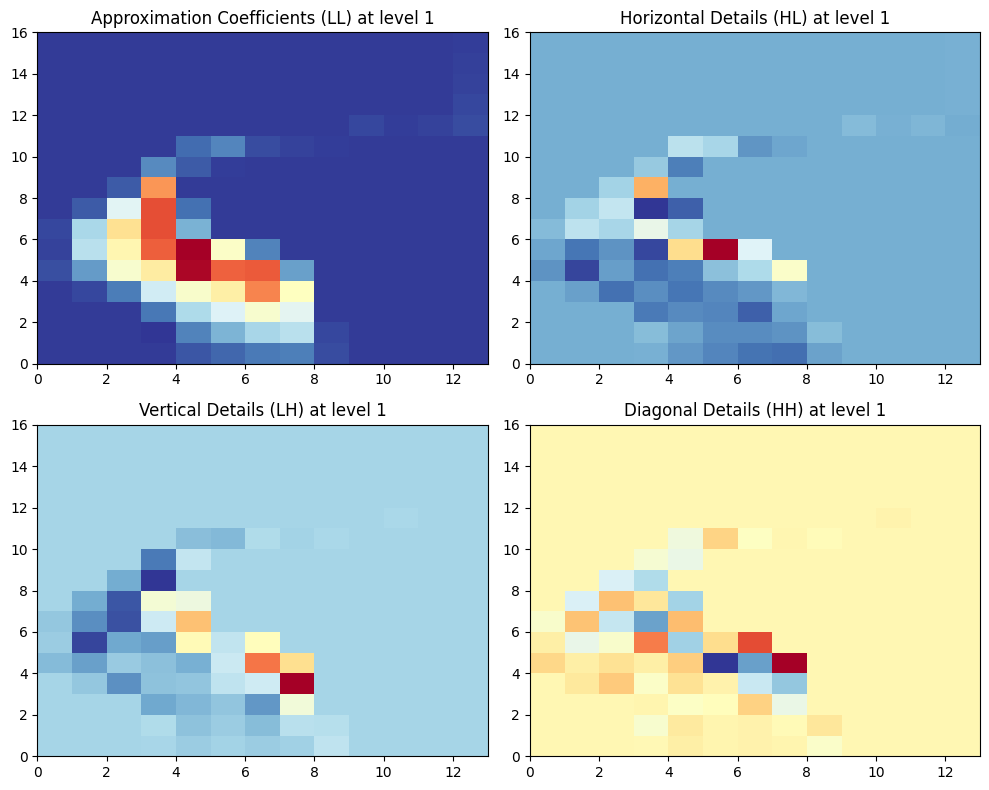

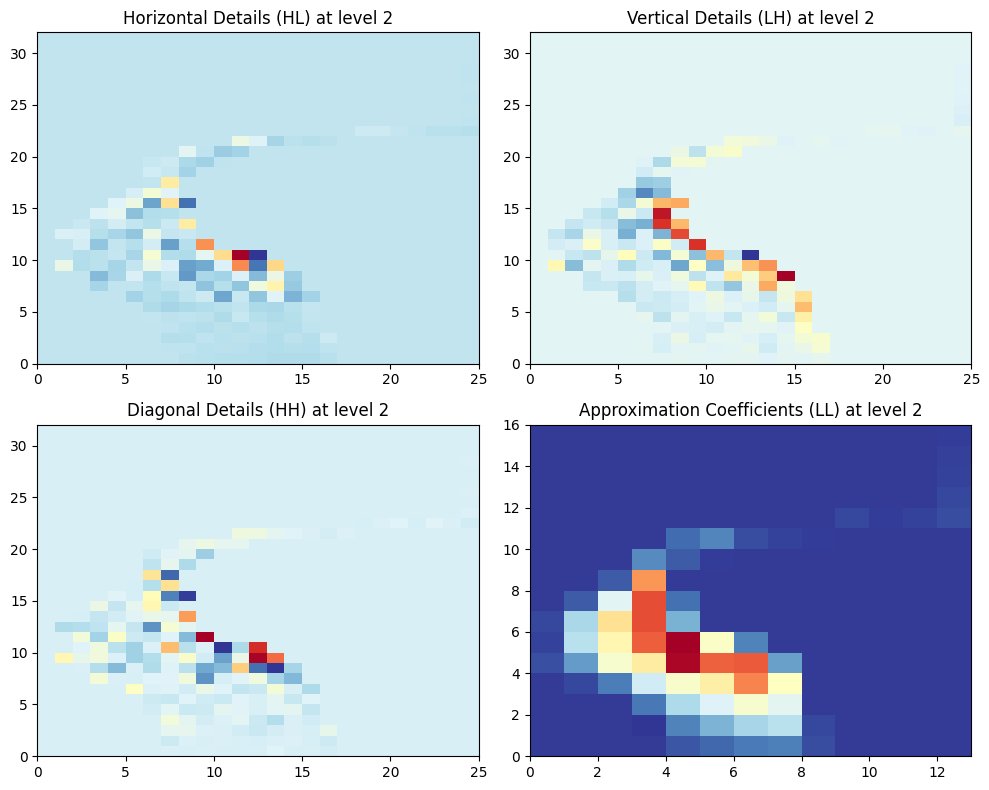

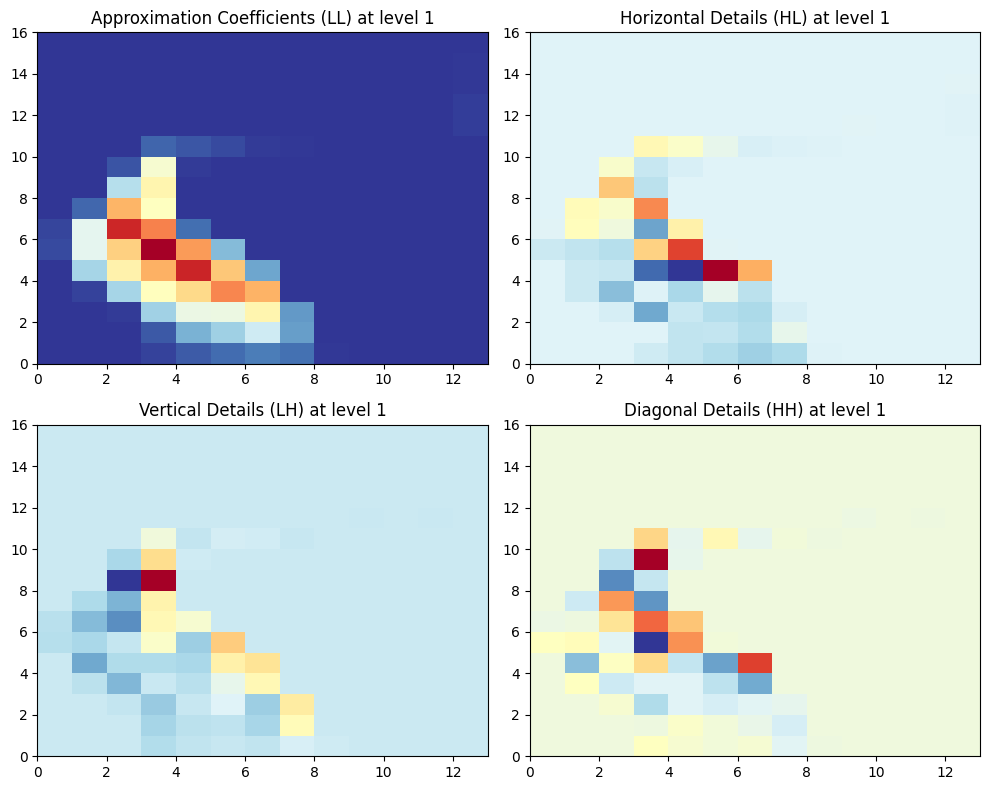

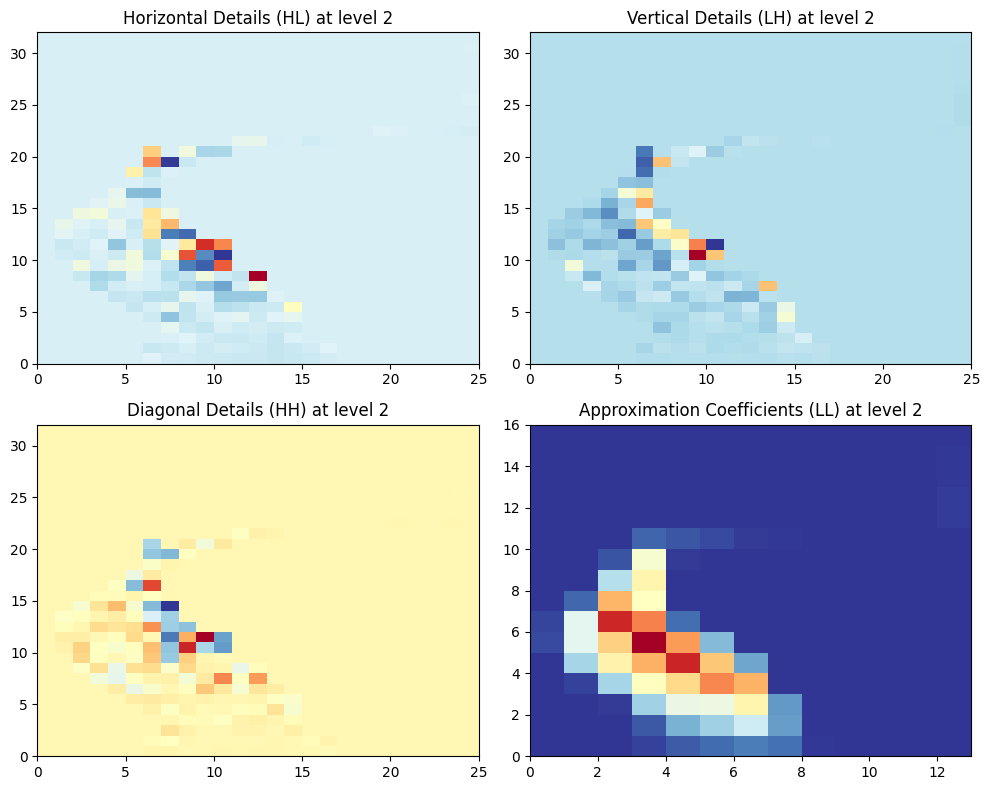

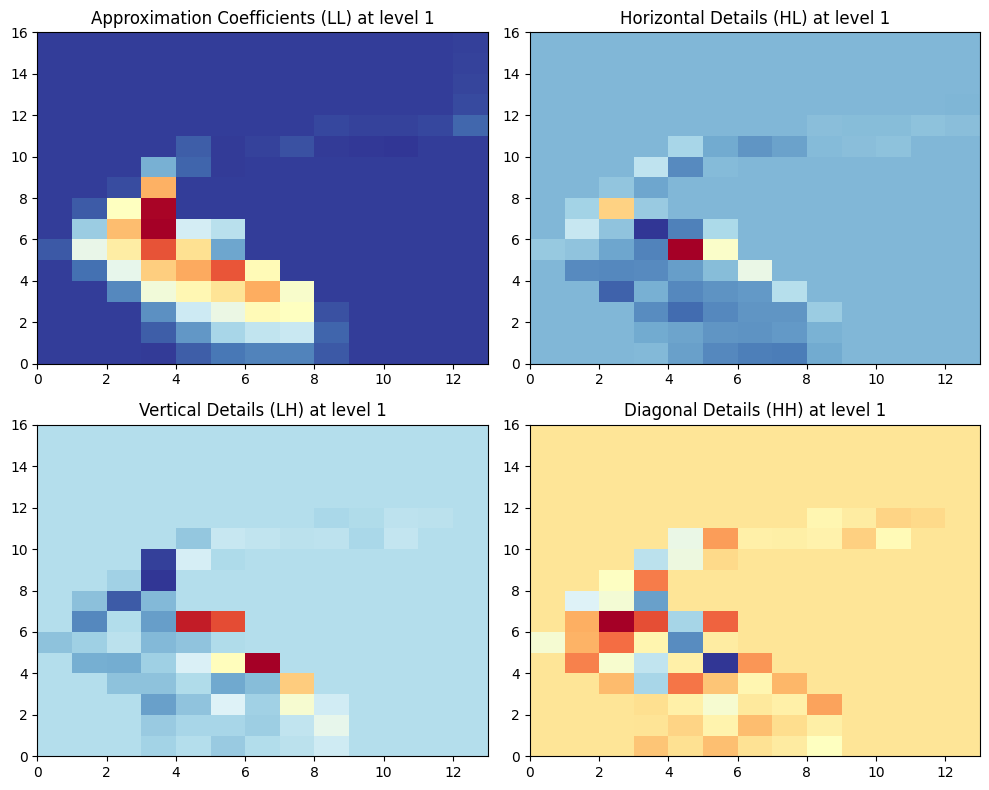

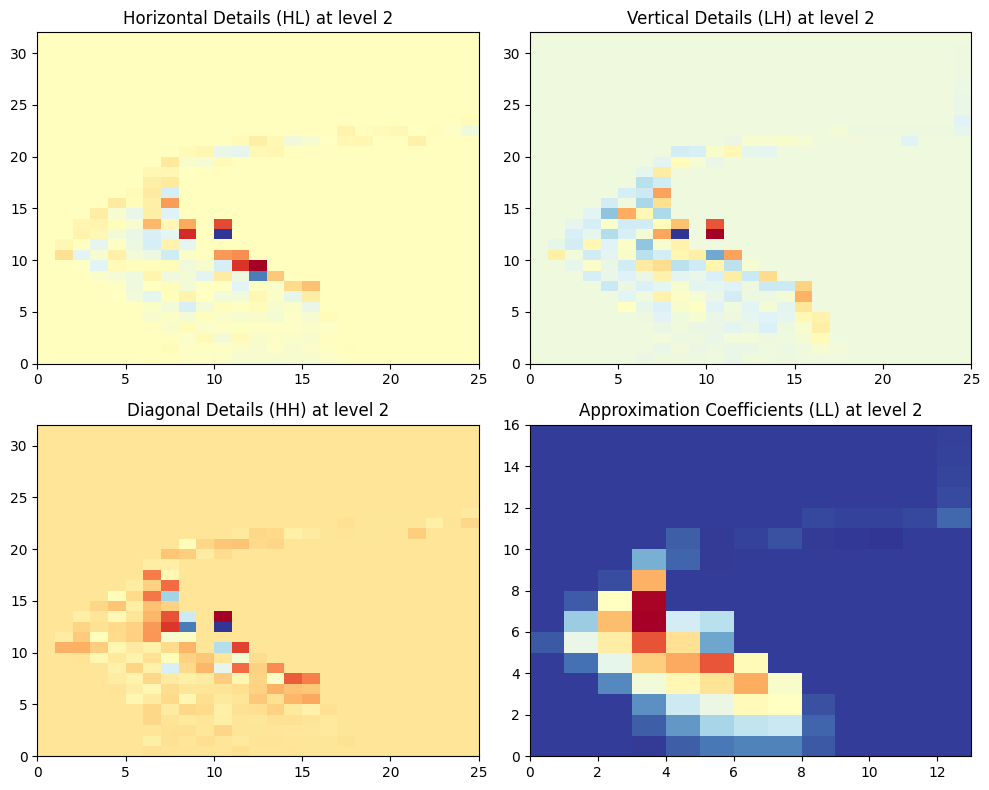

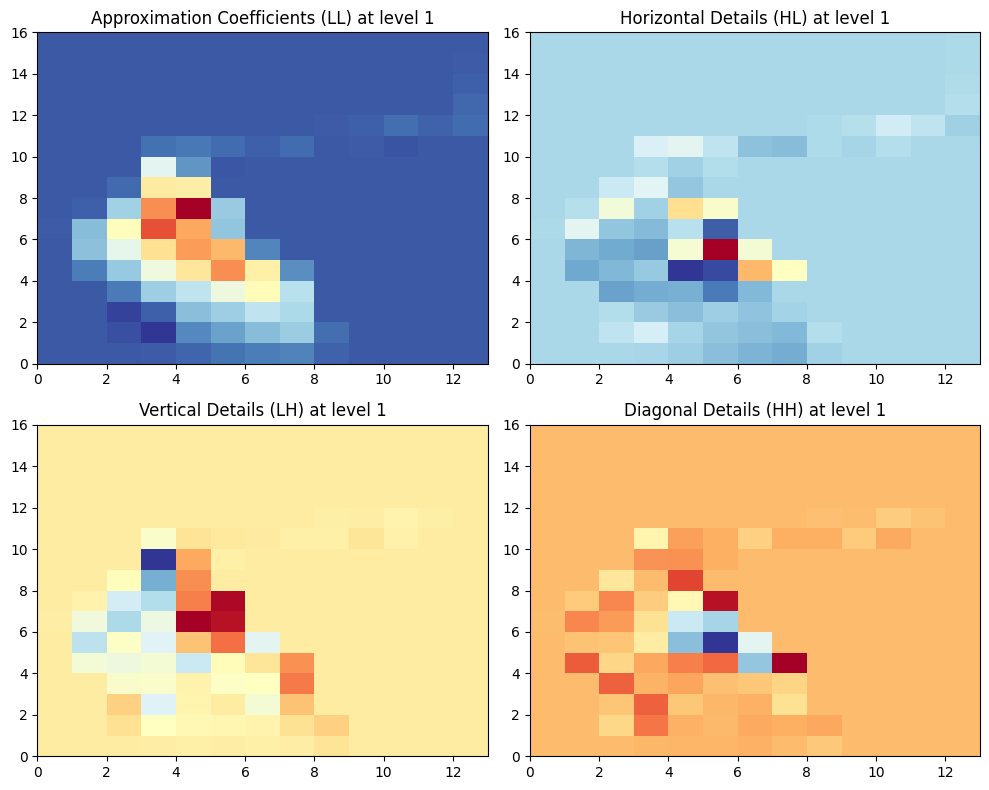

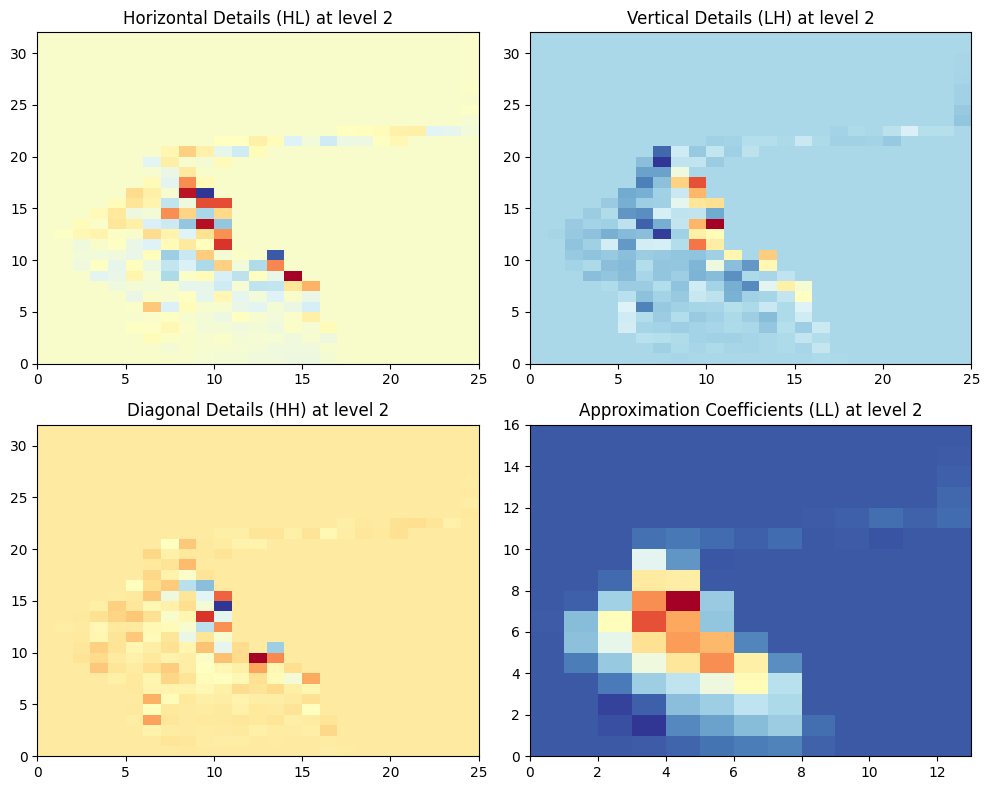

: 

In [70]:
for t in range(5):
    # Extract the 2D slice at timestep t
    img = train_data[t, :, :]
    
    # Perform wavelet decomposition
    coeffs = pywt.wavedec2(img, wavelet=wavelet, level=level)
    LL, (HL, LH, HH) = coeffs[0], coeffs[1]
    # Visualizing the coefficients at level 1 and level 2
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))

    # Level 1 approximation and detail coefficients
    axs[0, 0].pcolormesh(coeffs[0], cmap='RdYlBu_r')
    axs[0, 0].set_title("Approximation Coefficients (LL) at level 1")

    axs[0, 1].pcolormesh(coeffs[1][0], cmap='RdYlBu_r')
    axs[0, 1].set_title("Horizontal Details (HL) at level 1")

    axs[1, 0].pcolormesh(coeffs[1][1], cmap='RdYlBu_r')
    axs[1, 0].set_title("Vertical Details (LH) at level 1")

    axs[1, 1].pcolormesh(coeffs[1][2], cmap='RdYlBu_r')
    axs[1, 1].set_title("Diagonal Details (HH) at level 1")

    plt.tight_layout()
    plt.show()

    # Now level 2 (finer decomposition)
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))

    # Level 2 approximation and detail coefficients
    axs[0, 0].pcolormesh(coeffs[2][0], cmap='RdYlBu_r')
    axs[0, 0].set_title("Horizontal Details (HL) at level 2")

    axs[0, 1].pcolormesh(coeffs[2][1], cmap='RdYlBu_r')
    axs[0, 1].set_title("Vertical Details (LH) at level 2")

    axs[1, 0].pcolormesh(coeffs[2][2], cmap='RdYlBu_r')
    axs[1, 0].set_title("Diagonal Details (HH) at level 2")

    axs[1, 1].pcolormesh(coeffs[0], cmap='RdYlBu_r')
    axs[1, 1].set_title("Approximation Coefficients (LL) at level 2")

    plt.tight_layout()
    plt.show()


(0.0, 1.0, 0.0, 1.0)

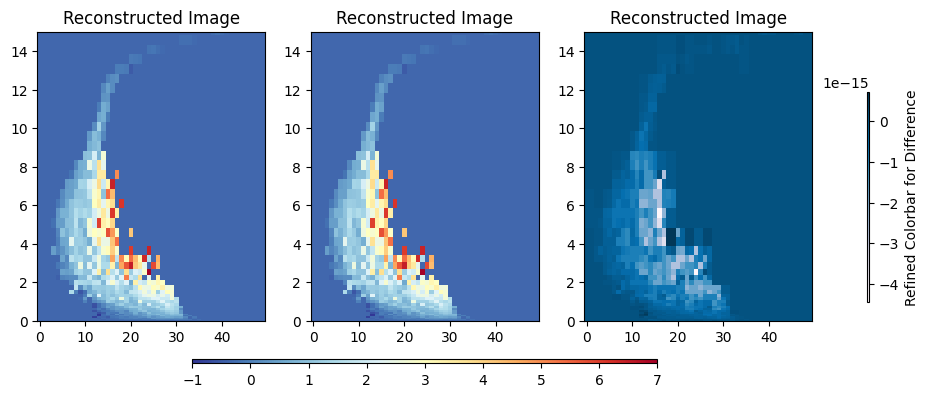

In [53]:
fig, ax = plt.subplots(1,3, figsize=(10,5))

im = ax[0].pcolormesh(XX,ZZ, reconstructed_img, cmap='RdYlBu_r', vmin=-1, vmax=7)
ax[0].set_ylim(0,15)
ax[0].set_title('Reconstructed Image')

ax[1].pcolormesh(XX,ZZ, img, cmap='RdYlBu_r', vmin=-1, vmax=7)
ax[1].set_ylim(0,15)
ax[1].set_title('Reconstructed Image')

diff=img-reconstructed_img
im_diff = ax[2].pcolormesh(XX,ZZ, diff, cmap='PuBu', vmin=np.min(diff), vmax=np.max(diff))
ax[2].set_ylim(0,15)
ax[2].set_title('Reconstructed Image')

fig.colorbar(im, ax=ax[:], orientation='horizontal',  pad=0.1, aspect=110, shrink=0.6)
# Add a second refined colorbar for the original image, with custom limits
cax = fig.add_axes([0.87, 0.2,0.1, 0.7])
cbar_refined = fig.colorbar(im_diff, ax=cax, orientation='vertical', pad=0.2,  aspect=110, shrink=0.6)
cbar_refined.set_label('Refined Colorbar for Difference')
#cbar_refined.set_clim(vmin=-1, vmax=1)  # Set refined limits for the second colorbar

cax.axis('off')

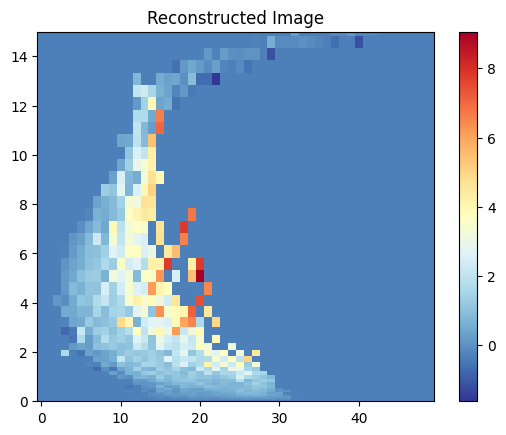

In [16]:
# Parameters
wavelet = 'db1'  # Choose a wavelet, e.g., 'db1' (Daubechies), 'haar'
level = 2  # Decomposition level
nt = len(train_data)
# Decomposition storage
coefficients = []

# Wavelet decomposition for each timestep
for t in range(20):
    # Extract the 2D slice at timestep t
    img = train_data[t, :, :]
    
    # Perform wavelet decomposition
    coeffs = pywt.wavedec2(img, wavelet=wavelet, level=level)
    coefficients.append(coeffs)
    """
    # Optional: Visualize approximation at the last level
    cA, (cH, cV, cD) = coeffs[0], coeffs[1]  # Approximation and details (level 1)
    plt.pcolormesh(cA, cmap='RdYlBu_r')
    plt.title(f'Approximation Coefficients at t={t}')
    plt.colorbar()
    plt.show()
    """

# To reconstruct an image at timestep t:
reconstructed_img = pywt.waverec2(coefficients[0], wavelet=wavelet)
plt.pcolormesh(XX,ZZ, reconstructed_img, cmap='RdYlBu_r')
plt.ylim(0,15)
plt.title('Reconstructed Image')
plt.colorbar()
plt.show()

In [20]:
coefficients[0][0].shape

(16, 13)

In [13]:
from sklearn.decomposition import PCA

In [14]:
import numpy as np
import pywt

def wavelet_decompose(image, wavelet='db4', level=2):
    coeffs = pywt.wavedec2(image, wavelet=wavelet, level=level)
    return coeffs

def select_top_wavelet_features(coeffs, n_features=5):
    # Flatten all coefficients into one array and calculate magnitudes
    flattened_coeffs = []
    for coeff in coeffs:
        if isinstance(coeff, tuple):
            for sub_coeff in coeff:
                flattened_coeffs.append(sub_coeff.ravel())
        else:
            flattened_coeffs.append(coeff.ravel())
    
    flattened_coeffs = np.concatenate(flattened_coeffs)
    
    # Sort coefficients by their magnitude (absolute value)
    abs_coeffs = np.abs(flattened_coeffs)
    sorted_indices = np.argsort(abs_coeffs)[::-1]  # Sort descending by magnitude
    
    # Keep only the n_features largest coefficients
    top_indices = sorted_indices[:n_features]
    
    # Zero out all other coefficients
    thresholded_coeffs = np.zeros_like(flattened_coeffs)
    thresholded_coeffs[top_indices] = flattened_coeffs[top_indices]
    
    return thresholded_coeffs, top_indices

def wavelet_reconstruct_from_features(coeffs, top_indices, n_features=5):
    # Create a list of coefficients from the thresholded coefficients
    reconstructed_coeffs = []
    offset = 0
    
    for coeff in coeffs:
        if isinstance(coeff, tuple):
            # If it is a tuple (for detail coefficients), process each subcomponent
            reconstructed_tuple = []
            for sub_coeff in coeff:
                size = sub_coeff.size
                reconstructed_tuple.append(sub_coeff.ravel())
                offset += size
            reconstructed_coeffs.append(tuple(reconstructed_tuple))
        else:
            # Approximation coefficients (lowest frequency part)
            size = coeff.size
            reconstructed_coeffs.append(coeff.ravel())
            offset += size
    
    return pywt.waverec2(reconstructed_coeffs, 'db4')

# Example usage

nx, nz = 64, 50
#image = np.random.rand(nx, nz)  # Replace with your actual image data

image=train_data[10]

# Step 1: Perform wavelet decomposition
coeffs = wavelet_decompose(image, wavelet='db4', level=2)

# Step 2: Select the 5 most significant wavelet features (by magnitude)
thresholded_coeffs, top_indices = select_top_wavelet_features(coeffs, n_features=2)

# Step 3: Reconstruct the image using only the 5 main features
reconstructed_image = wavelet_reconstruct_from_features(coeffs, top_indices, n_features=2)

# Display or process the reconstructed image
print("Reconstructed image shape:", reconstructed_image.shape)


AxisError: Axis greater than data dimensions

In [38]:
image.shape

(64, 50)

In [27]:
for coeffe in wavelet_coeffs[i]:
    print(type(coeffe))

<class 'numpy.ndarray'>
<class 'tuple'>
<class 'tuple'>


In [29]:
wavelet_coeffs[i][1][0].sha

array([[-1.38653669e-07,  9.56775092e-17,  1.17587533e-07,
        -1.08308114e-05, -2.51898473e-04,  6.32383806e-04,
         9.00204030e-04,  5.22689755e-03, -1.15213808e-01,
        -1.62730903e-01, -2.44190343e-01, -2.28592058e-01,
        -4.09217238e-02,  9.59532626e-17,  9.40193462e-17,
         1.01272476e-16,  6.06605371e-17],
       [ 9.56775092e-17,  9.56775092e-17,  9.56775092e-17,
        -2.69113330e-05, -7.19283965e-04,  2.65141226e-03,
        -1.92444738e-03,  2.71129790e-02, -3.29324507e-01,
        -4.74596075e-01, -6.51338040e-01, -6.65241713e-01,
        -1.33770424e-01,  9.59532626e-17,  9.40193462e-17,
         1.01272476e-16,  6.06605371e-17],
       [-3.01420384e-06,  9.56775092e-17,  2.55624532e-06,
         2.36890451e-04,  1.44346532e-03,  5.35879228e-04,
        -3.48554007e-02,  3.82394826e-02,  2.07399493e-01,
         2.04031028e-01,  7.00781355e-01,  2.35078003e-01,
        -7.46884860e-03,  9.59532626e-17,  9.40193462e-17,
         1.01272476e-16,  6.0